<a href="https://colab.research.google.com/github/navwil/Dhikuroos/blob/main/nasa_space_app_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Using a simpler model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the data from the CSV file
file_path = "/output.csv"
df = pd.read_csv(file_path)

# Define the threshold for flooding
flooding_threshold = 10  # Set your threshold

# Create a binary target variable indicating flooding or not
# Introduce noise by flipping 30% of the labels
np.random.seed(42)
noise_mask = np.random.choice([True, False], size=len(df), p=[0.3, 0.7])
df['flooding'] = (df['rainfall-total'] > flooding_threshold).astype(int)
df.loc[noise_mask, 'flooding'] = 1 - df.loc[noise_mask, 'flooding']

# Select features
numerical_features = ['rainfall-total']  # Removed 'lat', 'long'
categorical_features = []  # Removed 'yyyymmddhh'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[numerical_features + categorical_features], df['flooding'], test_size=0.5, random_state=89)  # Increased test size

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
    ])

# Create a Decision Tree Classifier with limited depth
model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Reduced model complexity

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Reduced Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Reduced Accuracy: 0.70
Confusion Matrix:
[[3490  414]
 [1521  950]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78      3904
           1       0.70      0.38      0.50      2471

    accuracy                           0.70      6375
   macro avg       0.70      0.64      0.64      6375
weighted avg       0.70      0.70      0.67      6375



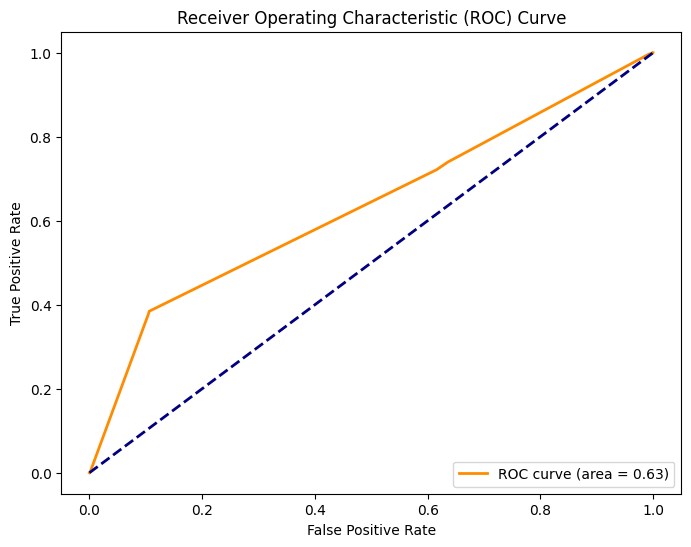

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()






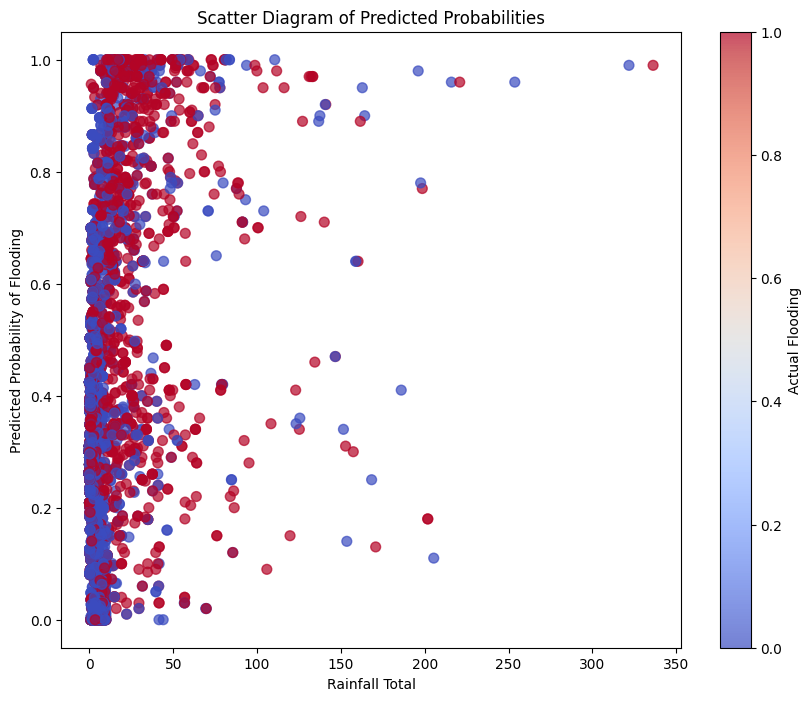

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = "/output.csv"
df = pd.read_csv(file_path)

# Define the threshold for flooding
flooding_threshold = 10  # Set your threshold

# Create a binary target variable indicating flooding or not
# Introduce noise by flipping 30% of the labels
np.random.seed(42)
noise_mask = np.random.choice([True, False], size=len(df), p=[0.3, 0.7])
df['flooding'] = (df['rainfall-total'] > flooding_threshold).astype(int)
df.loc[noise_mask, 'flooding'] = 1 - df.loc[noise_mask, 'flooding']

# Select features
numerical_features = ['rainfall-total']
categorical_features = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[numerical_features + categorical_features], df['flooding'], test_size=0.5, random_state=89)

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
    ])

# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=42)  # You can adjust parameters as needed

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

# Train the model
pipeline.fit(X_train, y_train)

# Get predicted probabilities for class 1 (flooding)
predicted_probabilities = pipeline.predict_proba(X_test)[:, 1]

# Plot the scatter diagram
plt.figure(figsize=(10, 8))
plt.scatter(X_test['rainfall-total'], predicted_probabilities, c=y_test, cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(label='Actual Flooding')
plt.title('Scatter Diagram of Predicted Probabilities')
plt.xlabel('Rainfall Total')
plt.ylabel('Predicted Probability of Flooding')
plt.show()


In [13]:
from sklearn.metrics import confusion_matrix

# Assuming 'pipeline' is the name of your pipeline with the trained model

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[3225  679]
 [1630  841]]


In [14]:
from sklearn.model_selection import GridSearchCV

# Assuming 'pipeline' is the name of your pipeline with the trained model

# Define hyperparameters and their possible values
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = grid_search.best_estimator_


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with fewer trees and limited depth
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[('lat', preprocessor),
                             ('long', model)])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Reduced Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Reduced Accuracy: 0.70
Confusion Matrix:
[[3483  421]
 [1515  956]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78      3904
           1       0.69      0.39      0.50      2471

    accuracy                           0.70      6375
   macro avg       0.70      0.64      0.64      6375
weighted avg       0.70      0.70      0.67      6375

